<a href="https://colab.research.google.com/github/Sankytanky100/ML-Pipelines/blob/main/US_Census_Income_Prediction_ML_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy: 0.8142082096427474
AdaBoost f1-score: 0.5311289072591062
Gradient Boost accuracy: 0.8187122530453476
Gradient Boost f1-score: 0.5474060822898033
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

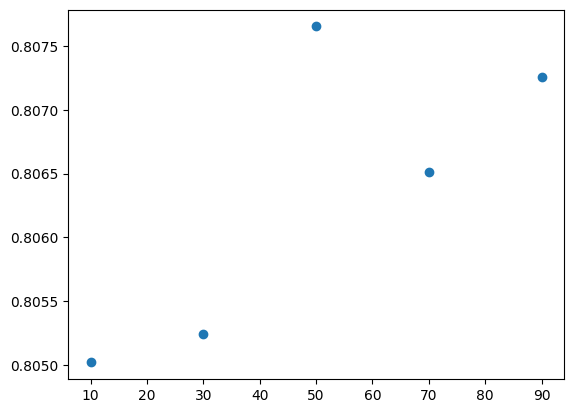

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

path_to_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

col_names = [
    'age', 'workclass', 'fnlwgt','education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss',
    'hours-per-week','native-country', 'income'
]

df = pd.read_csv(path_to_data, header=None, names = col_names)
print(df.head())

#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

target_column = "income"
raw_feature_cols = [
    'age',
    'education-num',
    'workclass',
    'hours-per-week',
    'sex',
    'race'
]

##1. Percentage of samples with income < and > 50k
print(df[target_column].value_counts(normalize=True))

##2. Data types of features
print(df[raw_feature_cols].dtypes)

##3. Preparing the features

X = pd.get_dummies(df[raw_feature_cols], drop_first=True)

X.head(n=5)


##4. Convert target variable to binary
y = np.where(df[target_column] == '<=50K', 0, 1)


##5a. Create train-est split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
##5b. Create base estimator and store it as decision_stump
decision_stump = DecisionTreeClassifier(max_depth=1)

##6. Create AdaBoost Classifier
ada_classifier = AdaBoostClassifier()

##7. Create GradientBoost Classifier
grad_classifier = GradientBoostingClassifier()

##8a.Fit models and get predictions
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

grad_classifier.fit(X_train, y_train)
y_pred_grad = grad_classifier.predict(X_test)

##8b. Print accuracy and F1
print(f"AdaBoost accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"AdaBoost f1-score: {f1_score(y_test, y_pred_ada)}")

print(f"Gradient Boost accuracy: {accuracy_score(y_test, y_pred_grad)}")
print(f"Gradient Boost f1-score: {f1_score(y_test, y_pred_grad)}")

##9. Hyperparameter Tuning
n_estimators_list = [10, 30, 50, 70, 90]

from sklearn.model_selection import GridSearchCV
estimator_parameters = {'n_estimators': n_estimators_list}
ada_gridsearch = GridSearchCV(ada_classifier, estimator_parameters, cv=5, scoring='accuracy', verbose=True)
ada_gridsearch.fit(X_train, y_train)

##10. Plot mean test scores
ada_scores_list = ada_gridsearch.cv_results_['mean_test_score']
plt.scatter(n_estimators_list, ada_scores_list)
plt.show()
plt.clf()

